In [1]:
import json
import pandas as pd
import json
import requests

In [2]:
#get stock from the user
stock=input()

AAPL


In [3]:
apikey="INSERTAPIKEYHERE"

url = "https://yfapi.net/v6/finance/quote"

querystring = {"symbols":stock}

headers = {
    'x-api-key': apikey
    }

response = requests.request("GET", url, headers=headers, params=querystring)

if response.status_code == 200:
    print("API request successful!")
else:
    print(f"Failed to retrieve data: {response.status_code}")

stock_json = response.json()



API request successful!


In [4]:
longname = stock_json['quoteResponse']['result'][0].get("longName", "Field Empty")
Price = str(stock_json['quoteResponse']['result'][0].get("regularMarketPrice", "Field Empty"))
Ticker = stock_json['quoteResponse']['result'][0].get("symbol", "Field Empty")
fiftytwoweeklow = str(stock_json['quoteResponse']['result'][0].get("fiftyTwoWeekLow", "Field Empty"))
fiftytwoweekhigh = str(stock_json['quoteResponse']['result'][0].get("fiftyTwoWeekHigh", "Field Empty"))

if stock_json['quoteResponse']['result'] == []:
    print("Invalid Stock Ticker")
else:
    print(
    longname +
    "\n Price: $" + Price +
    "\n Ticker Symbol: " + Ticker +
    "\n Fifty-Two Week Low: " + fiftytwoweeklow +
    "\n Fifty-Two Week High: " + fiftytwoweekhigh
)

Apple Inc.
 Price: $227.725
 Ticker Symbol: AAPL
 Fifty-Two Week Low: 164.08
 Fifty-Two Week High: 237.23


In [14]:
#API Pull for target mean price
apikey="INSERTAPIKEYHERE"

url = "https://yfapi.net/v11/finance/quoteSummary/" + stock + "?lang=en&region=US&modules=financialData"

querystring = {"symbols":stock}

headers = {
    'x-api-key': apikey
    }


response = requests.request("GET", url, headers=headers, params=querystring)

if response.status_code == 200:
    print("API request successful!")
else:
    print(f"Failed to retrieve data: {response.status_code}")


API request successful!


In [6]:
stock_json = response.json()

targetmeanprice = stock_json['quoteSummary']['result'][0]['financialData']['targetMeanPrice']['fmt']

if stock_json['quoteSummary']['result'][0] == []:
    print("Field does not exist")
else:
    print(
    "The target mean price of the stock is: $" + targetmeanprice
)


The target mean price of the stock is: $240.58


In [7]:

apikey="INSERTAPIKEYHERE"

url = "https://yfapi.net/v1/finance/trending/US"

querystring = {"symbols":stock}

headers = {
    'x-api-key': apikey
    }

response = requests.request("GET", url, headers=headers, params=querystring)

if response.status_code == 200:
    print("API request successful!")
else:
    print(f"Failed to retrieve data: {response.status_code}")

API request successful!


In [8]:
#print the company name and price
stock_json = response.json()

trendystock1 = stock_json['finance']['result'][0]['quotes'][0]['symbol']
trendystock2 = stock_json['finance']['result'][0]['quotes'][1]['symbol']
trendystock3 = stock_json['finance']['result'][0]['quotes'][2]['symbol']
trendystock4 = stock_json['finance']['result'][0]['quotes'][3]['symbol']
trendystock5 = stock_json['finance']['result'][0]['quotes'][4]['symbol']

if stock_json['finance']['result'][0]['quotes'] == []:
    print("No trending stocks")
print("5 current trending stocks are: \n" +
      trendystock1 +
      "\n" + trendystock2 +
      "\n" + trendystock3 +
      "\n" + trendystock4 +
      "\n" + trendystock5
)


5 current trending stocks are: 
AMSC
PWR
SNAP
SOL-USD
GC=F


In [9]:
# Create a Pandas DataFrame
data = {
    "Company Name": [longname],
    "Price": [Price],
    "Ticker": [Ticker],
    "52 Week Low": [fiftytwoweeklow],
    "52 Week High": [fiftytwoweekhigh],
    "Target Mean Price": [targetmeanprice],
    "Trending Stock 1": [trendystock1],
    "Trending Stock 2": [trendystock2],
    "Trending Stock 3": [trendystock3],
    "Trending Stock 4": [trendystock4],
    "Trending Stock 5": [trendystock5]
}

df = pd.DataFrame(data)


df.to_csv("stock_data.csv", index=False)

df


,Company Name,Price,Ticker,52 Week Low,52 Week High,Target Mean Price,Trending Stock 1,Trending Stock 2,Trending Stock 3,Trending Stock 4,Trending Stock 5
0,Apple Inc.,227.725,AAPL,164.08,237.23,240.58,AMSC,PWR,SNAP,SOL-USD,GC=F


In [11]:
apikey="INSERTAPIKEYHERE"

url = "https://yfapi.net/v8/finance/chart/AAPL?comparisons=" + stock + "%2C%5EVIX&range=1mo&region=US&interval=1wk&lang=en&events=div%2Csplit"


querystring = {"symbols":stock}

headers = {
    'x-api-key': apikey
    }

response = requests.request("GET", url, headers=headers, params=querystring)

if response.status_code == 200:
    print("API request successful!")
else:
    print(f"Failed to retrieve data: {response.status_code}")

API request successful!


In [12]:

stock_json = response.json()

pastfivedays = stock_json['chart']['result'][0]['indicators']['quote'][0]['high']

if stock_json['chart']['result'][0]['indicators']['quote'][0]['high'] == []:
    print("No trending stocks")

today = pastfivedays[0]
yesterday = pastfivedays[1]
daybeforeyesterday = pastfivedays[2]
daybeforedaybeforeyesterday = pastfivedays[3]
daybeforedaybeforedaybeforeyesterday = pastfivedays[4]
print("The high stock data for the past five days is: \n" + str(today) + "\n"+ str(yesterday) +"\n"+ str(daybeforeyesterday) +"\n"+ str(daybeforedaybeforeyesterday) +"\n"+ str(daybeforedaybeforedaybeforeyesterday))

The high stock data for the past five days is: 
232.9199981689453
229.0
224.0399932861328
233.08999633789062
229.52000427246094


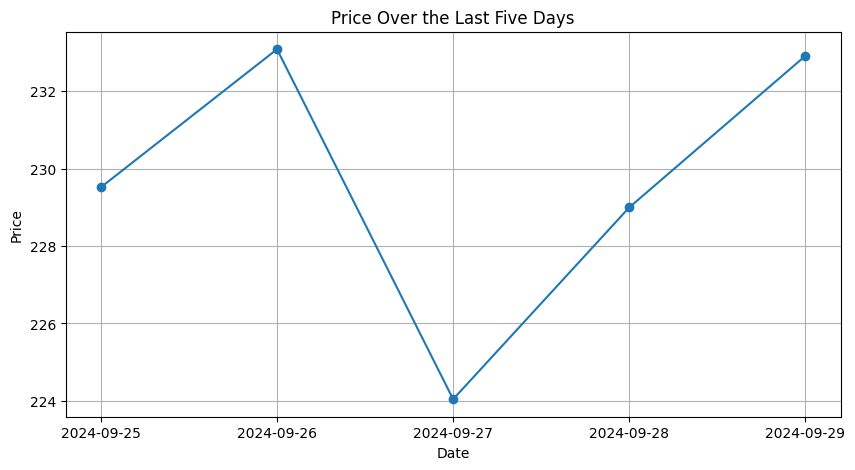

In [13]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime


prices = [today, yesterday, daybeforeyesterday, daybeforedaybeforeyesterday, daybeforedaybeforedaybeforeyesterday]


pastfivedays = [
    "2024-09-29",  # today
    "2024-09-28",  # yesterday
    "2024-09-27",  # day before yesterday
    "2024-09-26",  # day before the day before yesterday
    "2024-09-25"   # day before the day before the day before yesterday
]

# Convert date strings to datetime objects
dates = [datetime.strptime(date, "%Y-%m-%d") for date in pastfivedays]

# Create a line plot
plt.figure(figsize=(10, 5))
plt.plot(dates, prices, marker='o')

# Formatting the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())

# Add labels and title
plt.title("Price Over the Last Five Days")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid()

# Show the plot
plt.show()